---
Lectura de librerias y archivos
---

---

In [1]:
import pandas as pd
from locale import normalize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clear_(stop_words, words_):
    words = word_tokenize(words_)
    a  = []
    for r in words:
        if not r in (stop_words):
            if(len(r) > 2):
                a.append(normalize(r))
    return " ".join(map(str,a))

stop_words = set(stopwords.words("english"))
stop_words.add('null')
stop_words.add('nan')


___
__Limpieza de datos__
___

In [3]:
f = pd.read_csv("../CSV/persona.csv", delimiter = ";").astype(str)
vect = []
for i in range(0,len(f)):
    if (f["summary"][i]!="nan"):
        vect.append(f["summary"][i].lower().replace('ã','a').replace('á','a')
        .replace('ä','a').replace('é','e').replace('®','').replace('•','*'))

In [4]:
print(list(stop_words))
print(vect[0:3])


['a', "isn't", 'above', 'most', "you'd", 'doesn', "wasn't", 'it', 'up', 'don', 'shan', 'each', "weren't", 'with', 'm', 'there', 'was', 'mustn', 'is', 'ours', 'now', 'couldn', 's', 'she', 'you', "shouldn't", "you'll", 'yourself', 'while', 'we', 'more', 'myself', 'whom', 'needn', 'won', 'own', 'if', 'than', 'does', 'through', "aren't", 'isn', 'an', 'at', 'being', 'had', 'herself', 'o', 'but', 'll', 'ma', 'once', 'of', 'too', 'few', 'no', "mightn't", 'until', 'the', 'down', 'been', 'hadn', 'theirs', 'him', 'only', 'and', 'he', 'can', 'to', 'under', 'having', 'weren', 'same', 'her', 'here', 'yours', "hadn't", 'have', 'just', 'null', 'over', "haven't", "should've", 'why', 'after', "won't", 'from', "you're", 'shouldn', 'himself', 'd', 'other', 'yourselves', 've', 'when', 'all', 't', 'on', 'who', 'should', 'i', 'didn', 'be', 'has', 'so', 'between', "you've", 'below', 'me', 'doing', "that'll", "don't", 'ain', 'wasn', 'into', 'not', 'again', 'aren', 'what', "hasn't", 'both', "didn't", 'haven', 

In [5]:
b = []
for i in range(0,len(vect)):
    a =  clear_(stop_words,vect[i])
    b.append(a)

In [6]:
print(b[0:5])

['senior manager experience leading teams develop continuous improvement strategies manufacturing processes delivering excellent cost savings also specialist implementing progressive maintenance program', '', 'valuation services ten years experience tangible assets valuation services deloitte kpmg diverse areas including industrial automotive glass metal foods beverages pharmaceutical oil gas energy entertainment healthcare extractive telecommunications commercial office residential valuation experience assurance fiscal accounting purposes ppa ifrs sfas etc automotive industry experience years automotive martinrea developments toolroom maintenance projects areas education certifications mexican federal certified appraiser machinery equipment real property business rural specialties master degree valuation bachelor science mechatronic engineering associate science digital systems', 'dedicated focused solutions dreamer passionate forensic computing big data cellular communications intern

___
__Guardar los nuevos datos limpios__
___

In [7]:
datas = pd.DataFrame(b)
datas.to_csv("../CSV/persona2.csv",columns=None,index=None)

---
__Lectura de los datos limpios__
---

---

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


a = pd.read_csv("../CSV/persona2.csv", delimiter = ";").astype(str)
data = []
for i in range(0,len(a)):
    if a["0"][i] == 'nan':
        continue
        #data.append('null')
    else:    
        data.append(a["0"][i])




In [2]:
a = pd.read_csv("../CSV/job.csv", delimiter = ";").astype(str)
data2 = []
for i in range(0,len(a)):
    data2.append([])
    if a["organization_1"][i] == 'nan':
        continue
        #data2.append('null')
    else:    
        data2[i].append(a["organization_1"][i])
        data2[i].append(a["organization_2"][i])
        data2[i].append(a["organization_3"][i])
        data2[i].append(a["organization_4"][i])
        data2[i].append(a["organization_5"][i])
        data2[i].append(a["organization_6"][i])
        data2[i].append(a["organization_7"][i])
        data2[i].append(a["organization_8"][i])
        data2[i].append(a["organization_9"][i])
        data2[i].append(a["organization_10"][i])
        


In [5]:
#"""
print(data[0:3])
print(len(data))
#"""

#"""
print('\n\n')
print(data2[0:3])
print(len(data2))
#"""

['senior manager experience leading teams develop continuous improvement strategies manufacturing processes delivering excellent cost savings also specialist implementing progressive maintenance program', 'valuation services ten years experience tangible assets valuation services deloitte kpmg diverse areas including industrial automotive glass metal foods beverages pharmaceutical oil gas energy entertainment healthcare extractive telecommunications commercial office residential valuation experience assurance fiscal accounting purposes ppa ifrs sfas etc automotive industry experience years automotive martinrea developments toolroom maintenance projects areas education certifications mexican federal certified appraiser machinery equipment real property business rural specialties master degree valuation bachelor science mechatronic engineering associate science digital systems', 'dedicated focused solutions dreamer passionate forensic computing big data cellular communications internet p

In [3]:
a = pd.read_csv("../CSV/persona2.csv", delimiter = ";").astype(str)
b = pd.read_csv("../CSV/job.csv", delimiter = ";").astype(str)

def valor_null(valor):
    if valor == 'nan':
        return ''
    else: 
        return valor



data3 = []
for i in range(0,len(a)):
    c = (a["0"][i] + ' ' +  b["organization_1"][i] + ' ' +  b["organization_2"][i] 
    + ' ' +  b["organization_3"][i] + ' ' +  b["organization_6"][i] + ' ' 
    +  b["organization_7"][i] + ' ' +  b["organization_8"][i] + ' ' 
    +  b["organization_9"][i] + ' ' +  b["organization_10"][i])
    data3.append(c)



In [4]:
#print(b["organization_10"][0:10])
print(data3[0:5])

['senior manager experience leading teams develop continuous improvement strategies manufacturing processes delivering excellent cost savings also specialist implementing progressive maintenance program procter & gamble procter & gamble procter & gamble school group simón bolívar nan nan nan nan', 'nan accenture neoris ibm global business services nan nan nan nan nan', 'valuation services ten years experience tangible assets valuation services deloitte kpmg diverse areas including industrial automotive glass metal foods beverages pharmaceutical oil gas energy entertainment healthcare extractive telecommunications commercial office residential valuation experience assurance fiscal accounting purposes ppa ifrs sfas etc automotive industry experience years automotive martinrea developments toolroom maintenance projects areas education certifications mexican federal certified appraiser machinery equipment real property business rural specialties master degree valuation bachelor science mec

Separación de datos para entrenar y testear 
---

In [8]:
from sklearn.model_selection import train_test_split

# Validación de los datos, porcentaje de datos a dividir, 
# seleccionar una aleatoriedad fija para caso de otras pruebas 
# siempre tener el mismo balos
train_x, test_x = train_test_split(data, test_size=.85, random_state=42)
train_y, test_y = train_test_split(data2, test_size=.85, random_state=42)


In [5]:
#"""
train_x, test_x = data, data
train_y, test_y = data2, data2
#"""

In [10]:
print(train_x[0:1])
print(test_x[0:1])
print('\n\n\n')
print(train_y[0:1])
print(test_y[0:1])

['senior manager experience leading teams develop continuous improvement strategies manufacturing processes delivering excellent cost savings also specialist implementing progressive maintenance program']
['senior manager experience leading teams develop continuous improvement strategies manufacturing processes delivering excellent cost savings also specialist implementing progressive maintenance program']




[['procter & gamble', 'procter & gamble', 'procter & gamble', 'procter & gamble', 'procter & gamble', 'school group simón bolívar', 'nan', 'nan', 'nan', 'nan']]
[['procter & gamble', 'procter & gamble', 'procter & gamble', 'procter & gamble', 'procter & gamble', 'school group simón bolívar', 'nan', 'nan', 'nan', 'nan']]


Representación de texto a número (bag of words)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# En caso de tener los datos sin limpiar dentro 
# del parentecis se puede agregar un stop_words

CountV = CountVectorizer()
train_x_vector = CountV.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = CountV.transform(test_x)



"""

tfidf = TfidfVectorizer ()
train_y_vector = tfidf.fit_transform(train_y)
test_y_vector = tfidf.transform(test_y)
"""

'\n\ntfidf = TfidfVectorizer ()\ntrain_y_vector = tfidf.fit_transform(train_y)\ntest_y_vector = tfidf.transform(test_y)\n'

In [8]:
CountV = CountVectorizer(stop_words='english')
train = CountV.fit_transform(data3)

tfidf = TfidfVectorizer ()
train_y_vector = tfidf.fit_transform(data)
from sklearn.cluster import KMeans

#"""
sse = []
k_rng = range(1,50)
for k in k_rng:
    km = KMeans(n_clusters=k,max_iter=300)
    km.fit(train_y_vector)
    sse.append(km.inertia_)
#"""

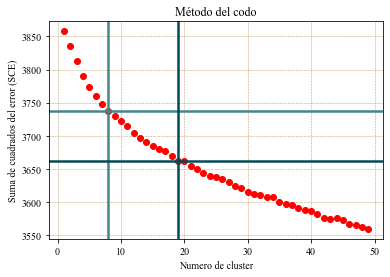

In [67]:
from matplotlib import pyplot as plt
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Método del codo')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=8,linewidth = 2.5,color='#45858C')
plt.axhline(y=3738,linewidth = 2.5,color='#45858C')
# plt.axvline(x=12,linewidth = 2.5)
# plt.axhline(y=3703.5,linewidth = 2.5)
plt.axvline(x=19,linewidth = 2.5,color='#024959')
plt.axhline(y=3662,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("Metodo_del_codo.eps",format='eps',dpi=1000)


In [23]:
from sklearn.cluster import KMeans

CountV = CountVectorizer(stop_words='english')
train = CountV.fit_transform(data3)


km = KMeans(n_clusters=12,max_iter=100)
label = km.fit_predict(train)


In [35]:
a = pd.read_csv("../CSV/persona.csv", delimiter = ";").astype(str)


a['label'] = label
print(a['label'])

a.to_csv('../CSV/persona.csv', header=False, index=False)

0        4
1        5
2       10
3        4
4        4
        ..
6049     1
6050     1
6051     1
6052     5
6053     1
Name: label, Length: 6054, dtype: int32


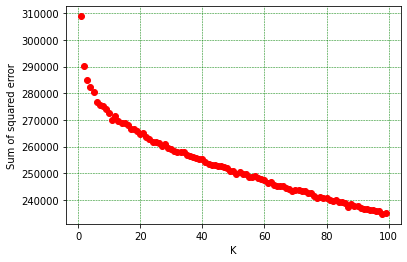

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,'ro')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

K Means
---

Metodo del codo

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,35)
for k in k_rng:
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit_transform(test_x_vector)
    sse.append(km.inertia_)

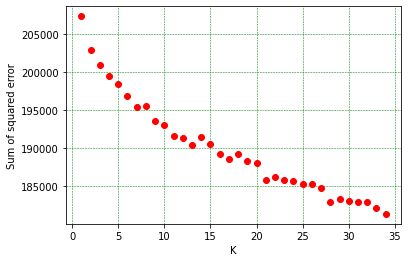

In [ ]:
from matplotlib import plot as plt
plt.xlabel('K')
plt.ylabel('Error Cuadratico')
plt.plot(k_rng,sse,'ro')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [ ]:
km = KMeans(n_clusters=10,random_state=0,max_iter=300)
km.fit_transform(train_x_vector)




array([[ 9.72222197,  8.92080242,  4.94705145, ..., 23.40939982,
         5.55969683,  4.57641514],
       [11.5482293 , 12.52185817, 10.24651573, ..., 25.03996805,
        10.2466708 ,  9.81953862],
       [11.1248191 , 10.2185397 ,  7.08513983, ..., 24.31049156,
         7.43505055,  6.87045853],
       ...,
       [ 9.75097944,  8.54319151,  4.40479875, ..., 23.74868417,
         4.68173388,  4.05707577],
       [ 9.60008333,  7.93808215,  3.05386803, ..., 23.51595203,
         4.22011711,  2.45891052],
       [10.29959222,  8.9465175 ,  5.00570419, ..., 23.89560629,
         5.62057836,  4.81574028]])